In [1]:
#Libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os
import requests
import tweepy

In [2]:

# Read CSV file
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

In [6]:
# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [7]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assessing the data

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive.duplicated().sum()


0

In [12]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive.tweet_id.duplicated().sum()

0

In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
twitter_archive.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
image_prediction.tweet_id.duplicated().sum()

0

In [24]:
image_prediction.jpg_url.duplicated().sum()

66

In [25]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [26]:
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [27]:
image_prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [28]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [29]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
tweet_json.duplicated().sum()


0

### Observations:
should be part of the twitter_archive table

missing data probably due to retweets in twitter_archive


# Observation Summary:

### twitter_archive table
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float, should all be str

only need original ratings with pictures, retweets and replies entries should be removed, related columns should be removed too. The picture part will be fixed later.

timestamp is str, should be datetime, remove +0000 in timestamp

abnormal values in rating_denominator, e.g., 170, 150, 130, etc. The rating_denominator is almost always 10

abnormal values in rating_numerator, e.g., 1776, 960, 666, 204, 165,etc. make no sense.

source info redundent, not easy to read


### tweet_json table
missing data probably due to retweets in twitter_archive

### image_prediction table
inconsistent capitalization in p1, p2 and p3 columns

jpg url duplicates

many entries are not dogs, e.g., jaguar, mailbox, peacock, cloak, etc.

we only need the most confident prediction for dog breed for this analysis


### Tidiness
twitter_archive: doggo, floofer, pupper, puppo are all stages of dog, should be in one column

The three tables should be combined into one since they're all related to the same type of observational unit 

according to tidy data requirements.

## Data Cleaning

In [31]:
# Make copies to preserve the original datasets
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

#### 1.Twitter_archive: we only want original ratings, delete retweets and replies

In [32]:
# Remove retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [33]:
# Remove replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [34]:
#CHECK
twitter_archive_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### 2.twitter_archive: drop columns that are related to retweets and replies. After dropping those columns, datatype issue with those columns will no longer be an issue


In [35]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

In [36]:
#check
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### 3. twitter_archive: datatype for timestamp should be datetime, remove +0000
Remove +0000 and use pd.to_datetime to convert timestamp from str to datetime

In [37]:
# Remove +0000
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

In [38]:
# Convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [39]:
#check
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### twitter_archive: redundant source information, replace the long url with different category names

In [40]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [41]:
twitter_archive_clean.source = twitter_archive_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})


In [42]:
#check
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### image_prediction: delete entries that are not dogs. Same with twitter_archive and tweet_json. Many abnormal rating values would be gone, making it easier to fix abnormal rating issues in rating_denominator and rating_numerator.

In [43]:
# Number of rows before data cleaning
print(image_prediction_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(2075, 12)
(2097, 12)
(2354, 3)


In [44]:
# Filter posts that are not dogs and put those tweet_id into a drop_list
image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the drop_list in all dataframes
image_prediction_clean = image_prediction_clean[~image_prediction_clean.tweet_id.isin(drop_list)]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(drop_list)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(drop_list)]

In [45]:
#check
# Number of rows after data cleaning
print(image_prediction_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(1751, 12)
(1792, 12)
(2031, 3)


#### twitter_archive: abnormal values in rating_denominator. According to the project overview, the ratings almost always have a denominator of 10. Many abnormal rating values were gone after removing ratings not for dogs, making it easier to fix abnormal rating. After investigating further, I found that tweets with denominator not equal to 10 are usually multiple dogs.


##### Create new dataframe with tweet_id, text, rating_numerator, rating_denominator columns. Filter rating_denominator not equal to 10 and check the text to correct these ratings.

In [46]:
# Create new dataframe with selected columns
df_abnormal_rating = twitter_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Filter rating_denominator not equal to 10
df_abnormal_denominator = df_abnormal_rating.query('rating_denominator != 10')

# Display full text
pd.set_option('display.max_colwidth', -1)

df_abnormal_denominator

/tmp/ipykernel_17427/3152241927.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [47]:
# Correct ratings by reading through the text, most of the abnormal ratings are associated with multiple dogs.
# tweet_id: 666287406224695296
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10
# tweet_id: 697463031882764288 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
# tweet_id: 684222868335505415 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10
# tweet_id: 682962037429899265 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# tweet_id: 710658690886586372 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
# tweet_id: 713900603437621249 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
# tweet_id: 709198395643068416 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
# tweet_id: 722974582966214656 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
# tweet_id: 716439118184652801
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
# tweet_id: 704054845121142784 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
# tweet_id: 677716515794329600 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
# tweet_id: 675853064436391936 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
# tweet_id: 810984652412424192  no rating
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10
# tweet_id: 820690176645140481 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
# tweet_id: 731156023742988288 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
# tweet_id: 758467244762497024 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10
# tweet_id: 740373189193256964
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

In [48]:
#check
twitter_archive_clean.rating_denominator.value_counts()

10    1792
Name: rating_denominator, dtype: int64

#### twitter_archive: abnormal values in rating_numerator. Many abnormal rating values were gone after removing ratings not for dogs.


In [50]:
twitter_archive_clean.rating_numerator.value_counts()

12    464
10    380
11    379
13    256
9     136
8     71 
7     31 
14    27 
6     16 
5     15 
4     6  
3     5  
2     2  
27    1  
0     1  
26    1  
75    1  
Name: rating_numerator, dtype: int64

In [51]:
# rating_numerator 75, 26, 27, 0
df_abnormal_rating.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')


,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [52]:
# Correct the ratings
# tweet_id: 786709082849828864, rating _numberator should be 9.75 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
# tweet_id: 680494726643068929, rating _numberator should be 11.26 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
# tweet_id: 778027034220126208, rating _numberator should be 11.27 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
# tweet_id: 835152434251116546
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 835152434251116546, 'rating_numerator'] = 11
# tweet_id: 883482846933004288
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5

In [53]:
# rating_numerator 3 and 4
df_abnormal_rating.query('rating_numerator == 3 or rating_numerator == 4')

,tweet_id,text,rating_numerator,rating_denominator
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
1303,707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4,10
1701,680940246314430465,This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,4,10
1938,673906403526995968,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,3,10
2070,671122204919246848,Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,4,10
2183,668989615043424256,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,3,10


#### rating_numerator = 3, not dog, delete

  .777885040357281792:
  
  .718246886998687744:
  
  .673906403526995968:


#### rating_numerator = 4, not dog, delete

 .707420581654872064
 
 .680940246314430465
 
 .671122204919246848
 
 .667176164155375616
 
 .666649482315059201

In [55]:
# Remove entries that are not dogs
id_list = [777885040357281792, 718246886998687744, 673906403526995968, 707420581654872064, 680940246314430465, 671122204919246848, 667176164155375616, 666649482315059201]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(id_list)]


In [56]:
#check
twitter_archive_clean.rating_numerator.value_counts()

12.00    464
11.00    380
10.00    380
13.00    256
9.00     136
8.00     71 
7.00     31 
14.00    27 
6.00     16 
5.00     14 
3.00     2  
2.00     2  
11.27    1  
9.75     1  
13.50    1  
4.00     1  
11.26    1  
Name: rating_numerator, dtype: int64

#### image_prediction: we only need the most confident prediction for the image
Create two columns breed, confident_level

Create a function to look through the preditions and find the most confident prediction that is a dog breed. p1 is the most confident prediction, followed by p2 and p3

Remove other columns not needed.

In [57]:
# Create a breed column and a confident_level column
breed = []
confident_level = []

# Create a function to find the most confident prediction that is a dog breed
# p1 is the most confident prediction, followed by p2 and p3
def image_pred(image_prediction_clean):
    if image_prediction_clean.p1_dog == True:
        breed.append(image_prediction_clean.p1)
        confident_level.append(image_prediction_clean.p1_conf)
    elif image_prediction_clean.p2_dog == True:
        breed.append(image_prediction_clean.p2)
        confident_level.append(image_prediction_clean.p2_conf)
    elif image_prediction_clean.p3_dog == True:
        breed.append(image_prediction_clean.p3)
        confident_level.append(image_prediction_clean.p3_conf)
    else:
        breed.append('Unknown_breed')
        confident_level.append(0)
        
# Apply the function by column        
image_prediction_clean.apply(image_pred, axis=1)

# Add the breed and confident_level column to image_prediction_clean 
image_prediction_clean['breed'] = breed
image_prediction_clean['confident_level'] = confident_level

# Drop columns no longer needed
image_prediction_clean = image_prediction_clean.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

In [58]:
image_prediction_clean.head()


,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


#### image_prediction: inconsistent capitalization in p1 column


In [59]:
image_prediction_clean.breed = image_prediction_clean.breed.str.capitalize()

In [60]:
#check
image_prediction_clean.head(10)

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden_retriever,0.775930


## Tidiness

#### Titter archive table
- doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column

In [62]:
# Melt the doggo, floofer, pupper and puppo columns to type and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_stage')

# Drop type column  
twitter_archive_clean.drop('type', 1, inplace = True)

# Sort by dog_stage and drop duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

/tmp/ipykernel_17427/3915047839.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean.drop('type', 1, inplace = True)


In [63]:
#check
twitter_archive_clean.dog_stage.value_counts()


None       1494
pupper     194 
doggo      63  
puppo      23  
floofer    10  
Name: dog_stage, dtype: int64

#### tweet_json should be added to twitter_archive table

In [65]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on = ['tweet_id'], how = 'left')


In [66]:
#check
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273
1,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,242,559
2,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,294,565
3,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,231,563
4,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12.0,10,None,None,2272,7148


#### Image prediction table
- Image predictions table should be added to twitter archive table

In [67]:
# Merge tables
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,
                            on = ['tweet_id'], how = 'left')

# number of null values before cleaning
twitter_archive_clean.jpg_url.isnull().sum()

126

In [68]:
twitter_archive_clean = (twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()])

In [69]:
#check
# number of null values after cleaning
twitter_archive_clean.jpg_url.isnull().sum()

0

### Save cleaned data

In [70]:
# View the dataframe
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confident_level
0,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175
1,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088
2,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957
3,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709
4,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12.0,10,None,None,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,Beagle,0.636169


In [72]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analysis and visualization

In [73]:
# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

#### Most used Twitter Source

In [75]:
source = df['source'].value_counts()
source

Twitter for iPhone    1627
Twitter Web Client    22  
TweetDeck             9   
Name: source, dtype: int64

#### WeRateDogs Retweet over time ?

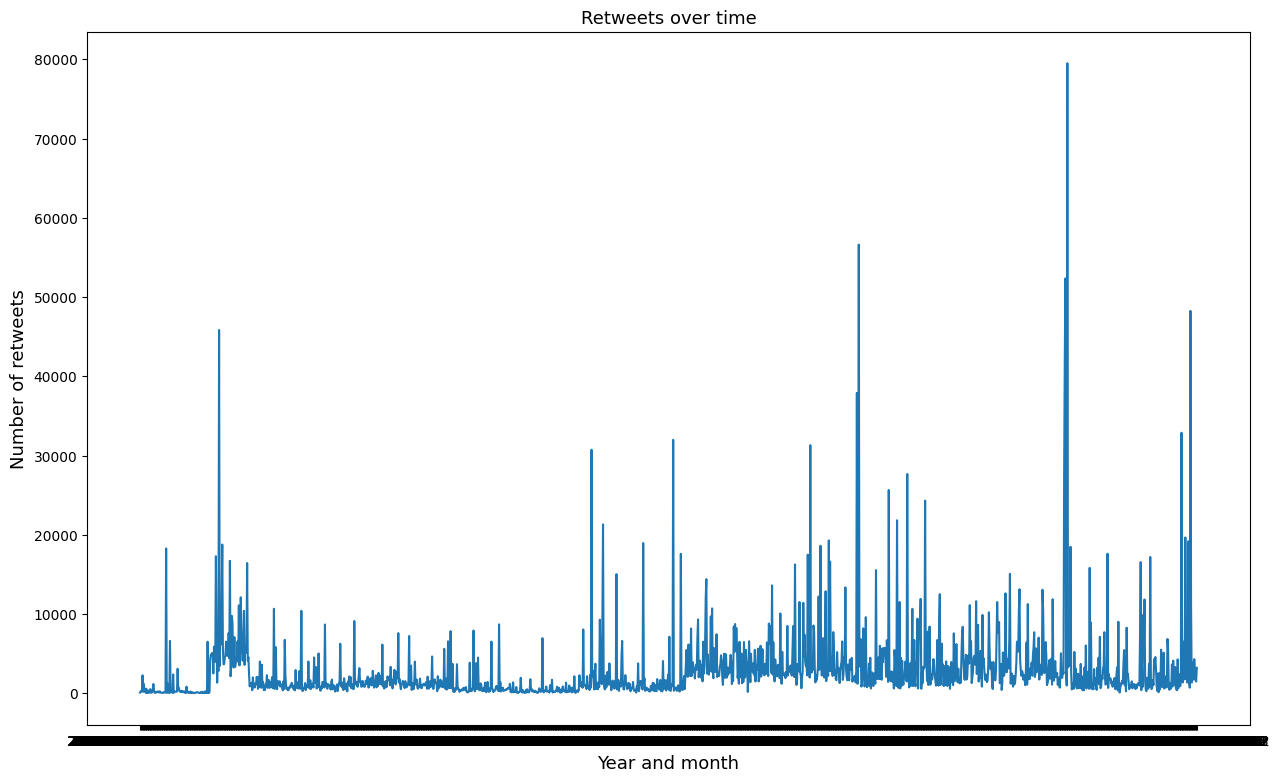

In [76]:
#plot
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(df.timestamp, df.retweet_count)
plt.title('Retweets over time', color = 'black', fontsize = '13')
plt.xlabel('Year and month', color = 'black', fontsize = '13')
plt.ylabel('Number of retweets', color = 'black', fontsize = '13');

#### Most popular dog name

In [78]:
pname = df.name.value_counts()[1:10]

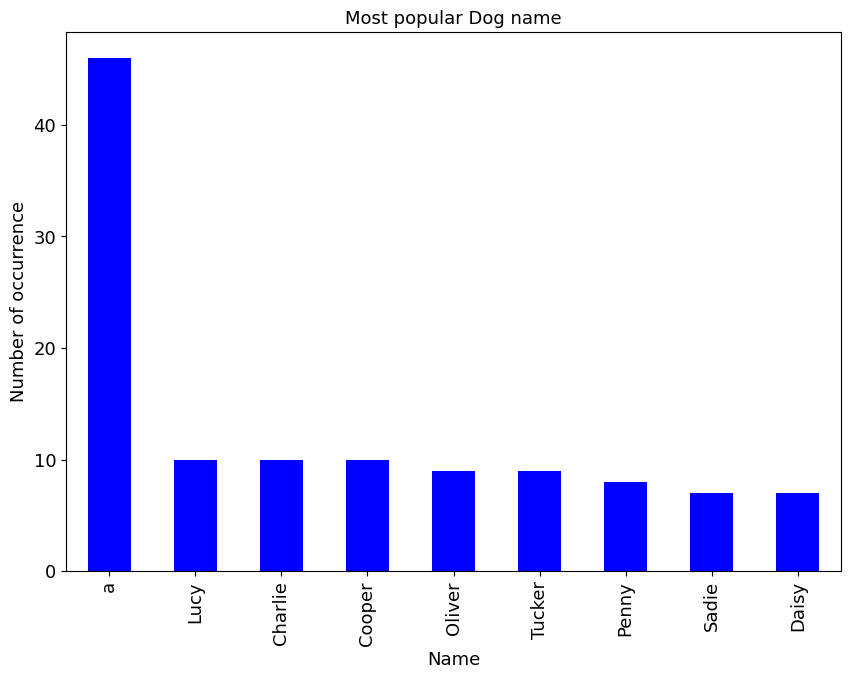

In [79]:
#plot
g_bar = pname.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Most popular Dog name', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

#### Is there a correlation between Favorite and Retweet ?

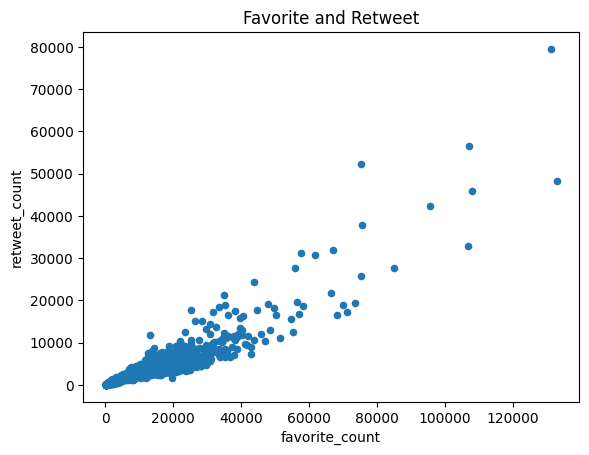

In [80]:
# Correlation between profit and budget
df.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite and Retweet');

#### Popular dog breeds based on:
- number of original tweets
- number of total retweets
- number of total favorite

In [82]:
df.breed.value_counts()

Golden_retriever      156
Labrador_retriever    106
Pembroke              94 
Chihuahua             88 
Pug                   62 
                      .. 
Japanese_spaniel      1  
Standard_schnauzer    1  
Irish_wolfhound       1  
Scotch_terrier        1  
Clumber               1  
Name: breed, Length: 113, dtype: int64

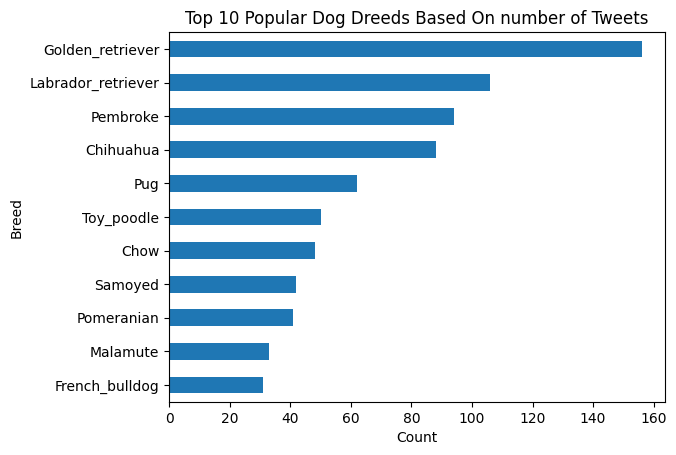

In [83]:
# Plot bar chart for top 10 popular breeds based on number of posts
df.breed.value_counts()[10::-1].plot(kind = 'barh', title = 'Top 10 Popular Dog Dreeds Based On number of Tweets')
plt.xlabel('Count')
plt.ylabel('Breed');

#### From the graph, the Golden retriever is the most popular dog breed with 156 tweets. Labrador_retriever is the second popular breed with 106 tweets. The next three breeds are Pembroke (94), Chihuahua (88) and Pug(62) followed by other breeds in descending order.

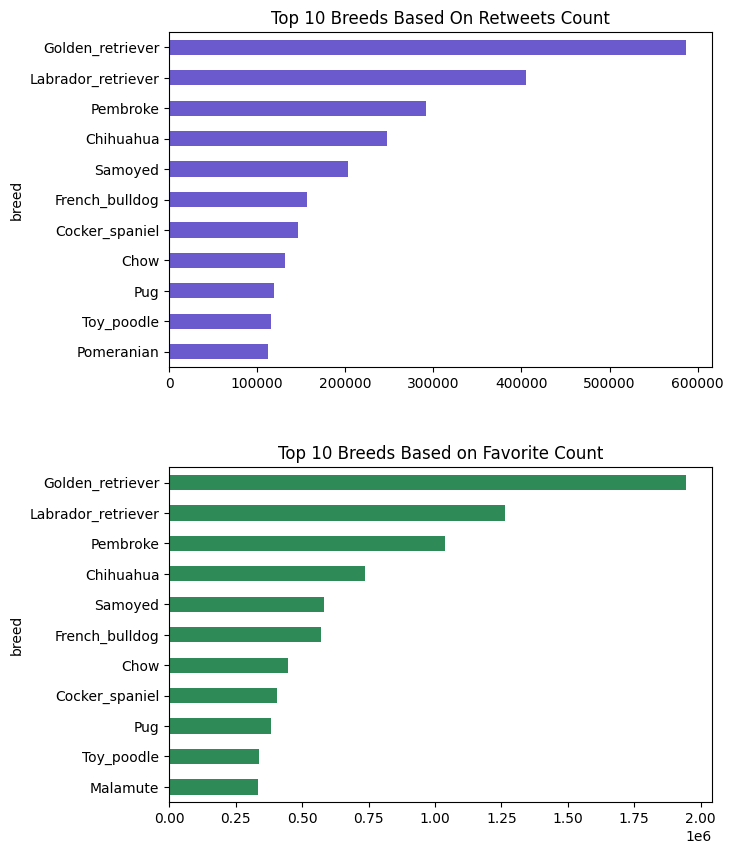

In [85]:
# Data to plot
columns = ['breed', 'retweet_count', 'favorite_count']
df_breed = df[columns]

breed_retweet = df_breed.groupby('breed')['retweet_count'].agg('sum').sort_values(ascending=False)[10::-1]
breed_favorite = df_breed.groupby('breed')['favorite_count'].agg('sum').sort_values(ascending=False)[10::-1]

# Plot horizontal bar chart
fig, (ax1, ax2) = plt.subplots(2, 1)

# Top 10 breeds based on number of retweets
breed_retweet.plot.barh(ax=ax1, figsize=(7,10), color='#6A5ACD')
ax1.set_title("Top 10 Breeds Based On Retweets Count")

# Top 10 breeds based on number of favorite
breed_favorite.plot.barh(ax=ax2, color='#2E8B57')
ax2.set_title("Top 10 Breeds Based on Favorite Count")

fig.subplots_adjust(hspace=0.3)

#### Average ratings for popular dog breeds based on tweet count

In [87]:
# Make a list of top popular dog breeds based on number of tweets
top_tweet_count = df.breed.value_counts().sort_values(ascending=False).nlargest(10).rename_axis('dog_breed').reset_index(name='tweet_counts')
breed_list = top_tweet_count.dog_breed.tolist()

# Average rating for top breeds based on number of tweets
avg_rating = df.groupby('breed').rating_numerator.mean().sort_values(ascending=False).rename_axis('breed').reset_index(name='avg_rating')
breed_avg_rating = avg_rating[avg_rating['breed'].isin(breed_list)]

breed_avg_rating

,breed,avg_rating
10,Samoyed,11.690476
11,Golden_retriever,11.612179
15,Pembroke,11.425532
16,Chow,11.416667
28,Labrador_retriever,11.198113
43,Toy_poodle,11.000000
47,Pomeranian,10.945122
51,Malamute,10.878788
61,Chihuahua,10.693182
78,Pug,10.241935


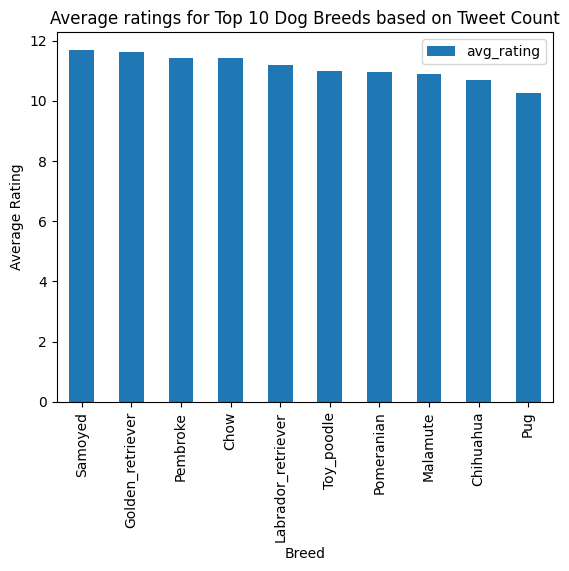

In [88]:
# Plot chart
breed_avg_rating.plot(kind='bar', x='breed', y='avg_rating')  
plt.title('Average ratings for Top 10 Dog Breeds based on Tweet Count')
plt.ylabel("Average Rating")
plt.xlabel("Breed");

##### popular dogs are very similar to each other.


### Soiurce

In [90]:
df.source.value_counts()

Twitter for iPhone    1627
Twitter Web Client    22  
TweetDeck             9   
Name: source, dtype: int64

In [91]:
df.source.value_counts(normalize=True)

Twitter for iPhone    0.981303
Twitter Web Client    0.013269
TweetDeck             0.005428
Name: source, dtype: float64

##### the majority of users are iphone users(98%).